In [1]:
import pandas as pd

# Read a CSV file with semicolon delimiter
df = pd.read_csv('HasilPreProcess.csv', delimiter=',')

# Display the first five rows of the DataFrame
df = pd.DataFrame(df)
df

,Unnamed: 0,id,date,username,latitude,longitude,final_tweet
0,0,1387917769501515778,2021-04-29 23:52:37+00:00,MaseebAkhter,24.972077,67.064381,rd jumma mubarak
1,2,1387914934533513220,2021-04-29 23:41:21+00:00,PolsekPlaju3,-3.190822,104.794609,lawan covid sinergitas tni polri cegah tular c...
2,3,1387913431865610244,2021-04-29 23:35:22+00:00,irfania_real,31.315389,74.222395,jummah mubarak
3,4,1387911958393987075,2021-04-29 23:29:31+00:00,kenny_thok,-2.455096,111.930698,semangat ya neng isolasi pakai sek pondok deri...
4,5,1387907774441566213,2021-04-29 23:12:54+00:00,kejarirohul,0.902542,100.308263,kamis tanggal april kepala seksi intelijen ari...
...,...,...,...,...,...,...,...
8109,9332,1536673294782709760,2022-06-14 11:33:58+00:00,StellaSuwardi,-6.297602,106.770437,vaksinasi booster tingkat imunitas varian omic...
8110,9333,1536525461077262336,2022-06-14 01:46:31+00:00,natasya_puspa4,-6.364100,106.799599,jokowi menteri waspada hati hati varian omicro...
8111,9335,1536515216665899013,2022-06-14 01:05:49+00:00,Agistasyahka,-6.301652,106.974561,sebar virus omicron ba ba cepat banding varian...
8112,9336,1536358141377384448,2022-06-13 14:41:39+00:00,Ardi_Wdyto,-7.776581,113.198255,varian omicron


In [2]:
dftwit = df.drop(['Unnamed: 0','id','date','username','latitude','longitude'], axis =1)
dftwit

,final_tweet
0,rd jumma mubarak
1,lawan covid sinergitas tni polri cegah tular c...
2,jummah mubarak
3,semangat ya neng isolasi pakai sek pondok deri...
4,kamis tanggal april kepala seksi intelijen ari...
...,...
8109,vaksinasi booster tingkat imunitas varian omic...
8110,jokowi menteri waspada hati hati varian omicro...
8111,sebar virus omicron ba ba cepat banding varian...
8112,varian omicron


In [3]:
dftwit.index += 1
dftwit

,final_tweet
1,rd jumma mubarak
2,lawan covid sinergitas tni polri cegah tular c...
3,jummah mubarak
4,semangat ya neng isolasi pakai sek pondok deri...
5,kamis tanggal april kepala seksi intelijen ari...
...,...
8110,vaksinasi booster tingkat imunitas varian omic...
8111,jokowi menteri waspada hati hati varian omicro...
8112,sebar virus omicron ba ba cepat banding varian...
8113,varian omicron


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ambil kolom teks
corpus = dftwit['final_tweet']

# # Kata yang ingin Anda jadikan fitur
selected_word = ['covid','sars-cov-2','corona','batuk','batuk kering','pilek','kelelahan','sakit kepala',
                 'demam','sesak nafas','omicron','delta','tenggorokan','anosmia','diare']

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung tf-idf dari corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus.astype('U').values)

# Mendapatkan daftar kata yang digunakan sebagai fitur
feature_names = tfidf_vectorizer.get_feature_names_out()

# Hasil dalam bentuk DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Gabungkan dengan data awal jika perlu
result = pd.concat([corpus, tfidf_df], axis=1)

# Tampilkan hasilnya
print(result)

                                            final_tweet   aa  aaa  aaah  \
1                                      rd jumma mubarak  0.0  0.0   0.0   
2     lawan covid sinergitas tni polri cegah tular c...  0.0  0.0   0.0   
3                                        jummah mubarak  0.0  0.0   0.0   
4     semangat ya neng isolasi pakai sek pondok deri...  0.0  0.0   0.0   
5     kamis tanggal april kepala seksi intelijen ari...  0.0  0.0   0.0   
...                                                 ...  ...  ...   ...   
8111  jokowi menteri waspada hati hati varian omicro...  0.0  0.0   0.0   
8112  sebar virus omicron ba ba cepat banding varian...  0.0  0.0   0.0   
8113                                     varian omicron  0.0  0.0   0.0   
8114  breaking news omicron ba ba resmi deteksi indo...  NaN  NaN   NaN   
0                                                   NaN  0.0  0.0   0.0   

      aadmi  aaduuhh  aafiyah  aag  aah  aahe  ...  zubairi  zublihl  \
1       0.0      0.0      0

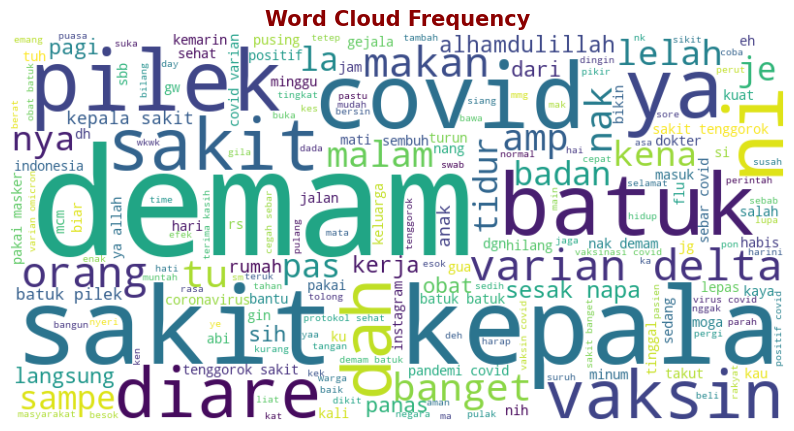

In [21]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

dftwit['final_tweet'] = dftwit['final_tweet'].apply(lambda x: str(x) if isinstance(x, (float, int)) else x)

# B. Word Frequency Analysis
reviews = ' '.join(dftwit['final_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Frequency', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Word Frequency Analysis.png')
plt.show()

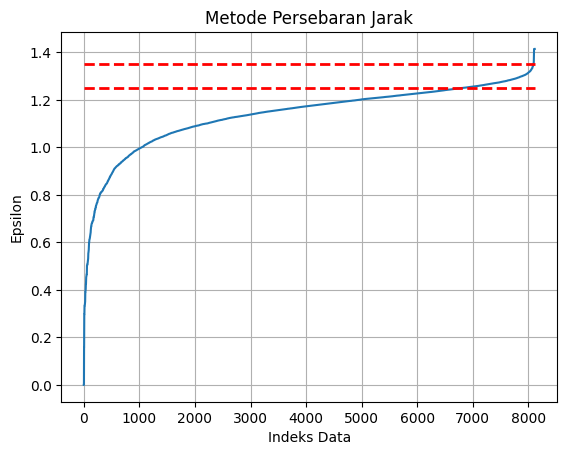

In [86]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Contoh data (asumsi data 2D)
data = tfidf_matrix

# Menghitung jarak ke K-tetangga terdekat
k = 5  # Jumlah tetangga terdekat yang akan dihitung
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data)
distances, indices = neigh.kneighbors(data)

# Menghitung jarak maksimum
distances = np.sort(distances, axis=0)
distances = distances[:, 2]  # Mengambil jarak ke tetangga ketiga

# Membuat plot untuk menentukan epsilon
plt.plot(distances)
plt.xlabel("Indeks Data")
plt.ylabel("Epsilon")
plt.title("Metode Persebaran Jarak")
plt.grid(True)
plt.hlines(y=[1.25,1.35], xmin=0, xmax=len(distances), color='red', linestyle='--', linewidth=2)
plt.show()


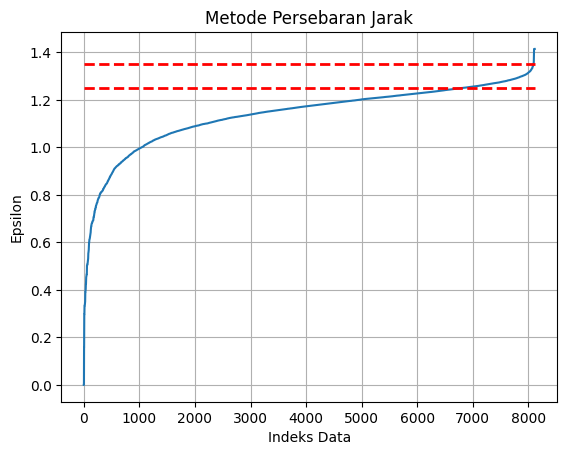

In [93]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Contoh data (asumsi data 2D)
data = tfidf_matrix

# Menghitung jarak ke K-tetangga terdekat
k = 10  # Jumlah tetangga terdekat yang akan dihitung
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data)
distances, indices = neigh.kneighbors(data)

# Menghitung jarak maksimum
distances = np.sort(distances, axis=0)
distances = distances[:, 2]  # Mengambil jarak ke tetangga ketiga

# Membuat plot untuk menentukan epsilon
plt.plot(distances)
plt.xlabel("Indeks Data")
plt.ylabel("Epsilon")
plt.title("Metode Persebaran Jarak")
plt.grid(True)
plt.hlines(y=[1.25,1.35], xmin=0, xmax=len(distances), color='red', linestyle='--', linewidth=2)
plt.show()


In [98]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Inisialisasi dan clustering dengan DBSCAN
dbscan = DBSCAN(eps=1.25, min_samples=5)
cluster_labels = dbscan.fit_predict(tfidf_matrix)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.0014497934329802422


In [99]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Inisialisasi dan clustering dengan DBSCAN
dbscan = DBSCAN(eps=1.35, min_samples=5) 
cluster_labels = dbscan.fit_predict(tfidf_matrix)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.005692140934901139


Estimated number of noise: 826
Silhouette Coefficient DBSCAN: 0.0014497934
Estimated number of clusters: 3
Estimated number of eps, minpts: 1.25, 5


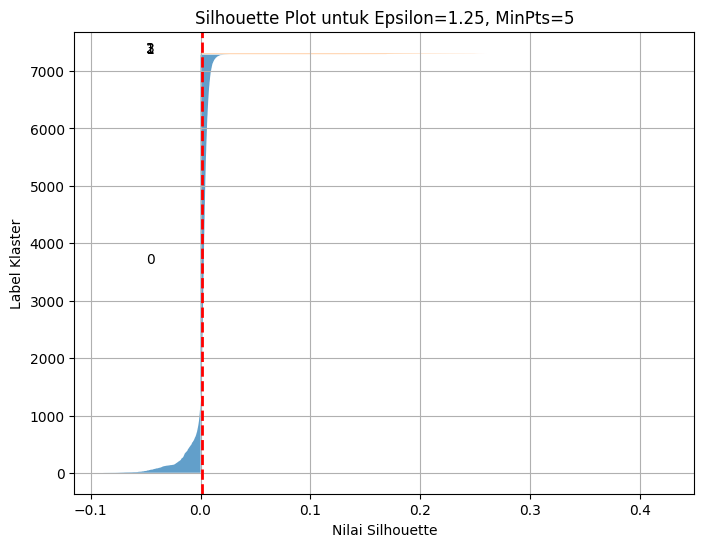

In [81]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn import metrics

dbscan = DBSCAN(eps=1.25, min_samples=5)
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

silhouette_avg = silhouette_score(tfidf_matrix, dbscan_labels)
silhouette_values = silhouette_samples(tfidf_matrix, dbscan_labels)

plt.figure(figsize=(8, 6))
y_lower = 10  # Nilai awal batas bawah pada plot

for i in range(len(set(dbscan_labels))):
    cluster_silhouette_values = silhouette_values[dbscan_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spasi antar klaster
    

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klasterisasi
noise_dbscan = sum(dbscan_labels == -1) / len(dbscan_labels)
noise = noise_dbscan * 8114
print(f"Estimated number of noise: {noise:.0f}")
    
sidb = silhouette_score(tfidf_matrix,dbscan.labels_)
print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(tfidf_matrix, dbscan_labels):.10f}")
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Estimated number of clusters: {dbscan_n_clusters}")
print(f"Estimated number of eps, minpts: 1.25, 5")

plt.title(f'Silhouette Plot untuk Epsilon=1.25, MinPts=5')
plt.xlabel('Nilai Silhouette')
plt.ylabel('Label Klaster')
plt.grid(True)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=2)
plt.show()

Estimated number of noise: 18
Silhouette Coefficient DBSCAN: 0.0056921409
Estimated number of clusters: 1
Estimated number of eps, minpts: 1.35, 5


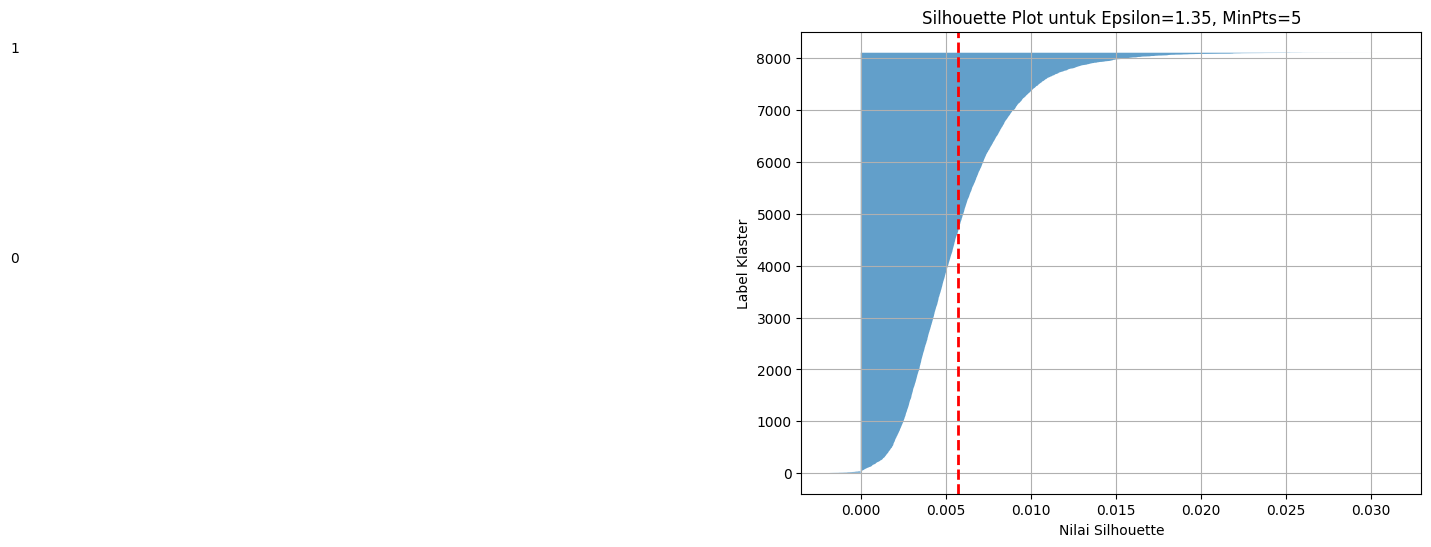

In [92]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn import metrics

dbscan = DBSCAN(eps=1.35, min_samples=5)
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

silhouette_avg = silhouette_score(tfidf_matrix, dbscan_labels)
silhouette_values = silhouette_samples(tfidf_matrix, dbscan_labels)

plt.figure(figsize=(8, 6))
y_lower = 10  # Nilai awal batas bawah pada plot

for i in range(len(set(dbscan_labels))):
    cluster_silhouette_values = silhouette_values[dbscan_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spasi antar klaster
    

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klasterisasi
noise_dbscan = sum(dbscan_labels == -1) / len(dbscan_labels)
noise = noise_dbscan * 8114
print(f"Estimated number of noise: {noise:.0f}")
    
sidb = silhouette_score(tfidf_matrix,dbscan.labels_)
print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(tfidf_matrix, dbscan_labels):.10f}")
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Estimated number of clusters: {dbscan_n_clusters}")
print(f"Estimated number of eps, minpts: 1.35, 5")

plt.title(f'Silhouette Plot untuk Epsilon=1.35, MinPts=5')
plt.xlabel('Nilai Silhouette')
plt.ylabel('Label Klaster')
plt.grid(True)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=2)
plt.show()

In [94]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Inisialisasi dan clustering dengan DBSCAN
dbscan = DBSCAN(eps=1.25, min_samples=10)  
cluster_labels = dbscan.fit_predict(tfidf_matrix)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.002454154467049287


In [95]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Inisialisasi dan clustering dengan DBSCAN
dbscan = DBSCAN(eps=1.35, min_samples=10) 
cluster_labels = dbscan.fit_predict(tfidf_matrix)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.005695195802282561


Estimated number of noise: 1056
Silhouette Coefficient DBSCAN: 0.0024541545
Estimated number of clusters: 2
Estimated number of eps, minpts: 1.25, 10


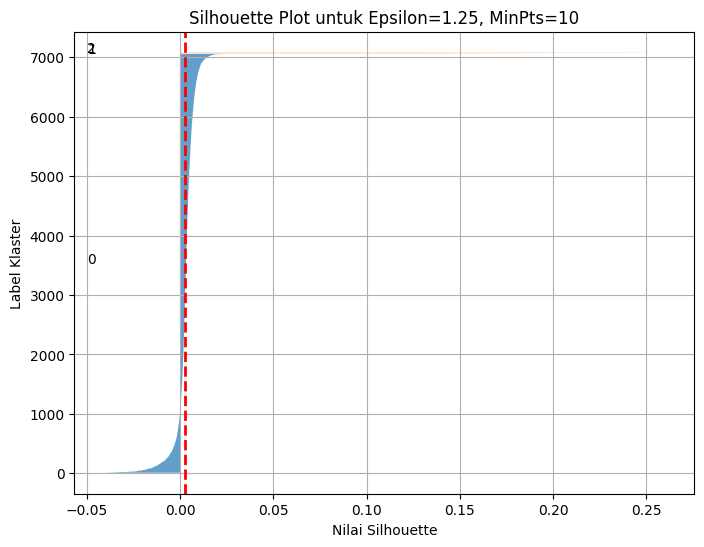

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn import metrics

dbscan = DBSCAN(eps=1.25, min_samples=10)
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

silhouette_avg = silhouette_score(tfidf_matrix, dbscan_labels)
silhouette_values = silhouette_samples(tfidf_matrix, dbscan_labels)

plt.figure(figsize=(8, 6))
y_lower = 10  # Nilai awal batas bawah pada plot

for i in range(len(set(dbscan_labels))):
    cluster_silhouette_values = silhouette_values[dbscan_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spasi antar klaster
    

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klasterisasi
noise_dbscan = sum(dbscan_labels == -1) / len(dbscan_labels)
noise = noise_dbscan * 8114
print(f"Estimated number of noise: {noise:.0f}")
    
sidb = silhouette_score(tfidf_matrix,dbscan.labels_)
print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(tfidf_matrix, dbscan_labels):.10f}")
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Estimated number of clusters: {dbscan_n_clusters}")
print(f"Estimated number of eps, minpts: 1.25, 10")

plt.title(f'Silhouette Plot untuk Epsilon=1.25, MinPts=10')
plt.xlabel('Nilai Silhouette')
plt.ylabel('Label Klaster')
plt.grid(True)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=2)
plt.show()

Estimated number of noise: 19
Silhouette Coefficient DBSCAN: 0.0056951958
Estimated number of clusters: 1
Estimated number of eps, minpts: 1.35, 10


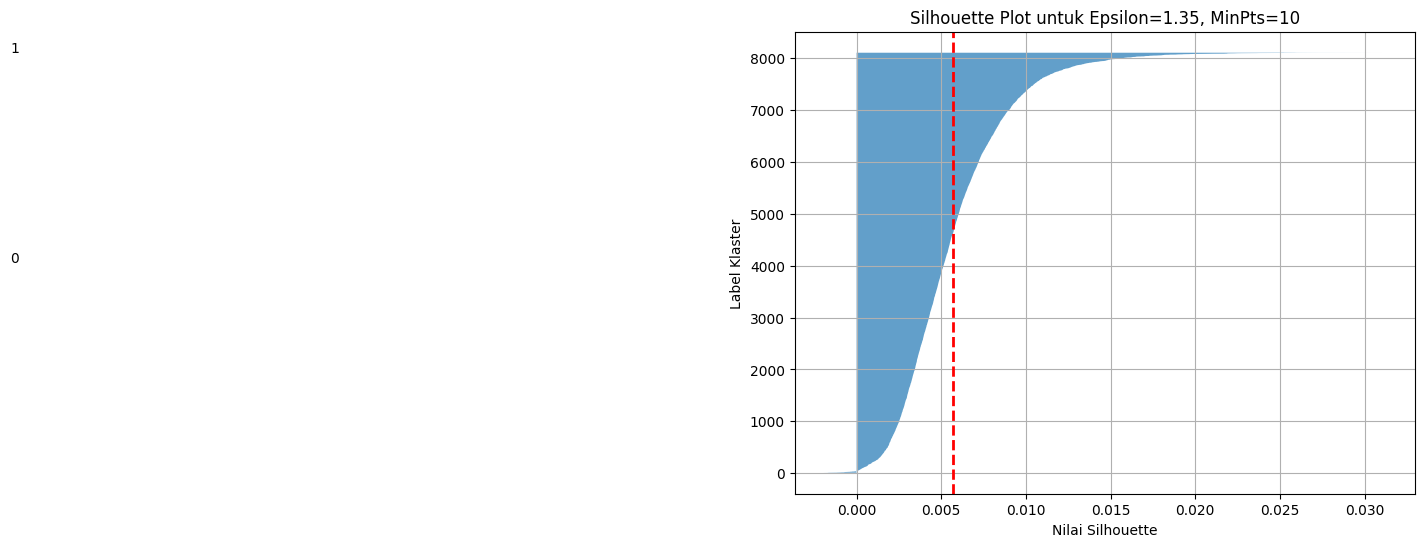

In [101]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn import metrics

dbscan = DBSCAN(eps=1.35, min_samples=10)
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

silhouette_avg = silhouette_score(tfidf_matrix, dbscan_labels)
silhouette_values = silhouette_samples(tfidf_matrix, dbscan_labels)

plt.figure(figsize=(8, 6))
y_lower = 10  # Nilai awal batas bawah pada plot

for i in range(len(set(dbscan_labels))):
    cluster_silhouette_values = silhouette_values[dbscan_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spasi antar klaster
    

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klasterisasi
noise_dbscan = sum(dbscan_labels == -1) / len(dbscan_labels)
noise = noise_dbscan * 8114
print(f"Estimated number of noise: {noise:.0f}")
    
sidb = silhouette_score(tfidf_matrix,dbscan.labels_)
print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(tfidf_matrix, dbscan_labels):.10f}")
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Estimated number of clusters: {dbscan_n_clusters}")
print(f"Estimated number of eps, minpts: 1.35, 10")

plt.title(f'Silhouette Plot untuk Epsilon=1.35, MinPts=10')
plt.xlabel('Nilai Silhouette')
plt.ylabel('Label Klaster')
plt.grid(True)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=2)
plt.show()

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Inisialisasi dan clustering dengan DBSCAN
dbscan = DBSCAN(eps=1.35, min_samples=10)  # Sesuaikan dengan nilai epsilon dan MinPts yang sesuai
cluster_labels = dbscan.fit_predict(tfidf_matrix)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.005692140934901139


In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud for each cluster
for label in np.unique(dbscan_labels):
  if label == -1:
    continue

  # Get the words in this cluster
  cluster_words = []
  for i, point in enumerate(tfidf_matrix):
    if dbscan_labels[i] == label:
      cluster_words.append(' '.join(point))

  # Create a word cloud for this cluster
  wordcloud = WordCloud().generate(' '.join(cluster_words))

  # Display the word cloud
  plt.imshow(wordcloud)
  plt.title('Cluster ' + str(label))
  plt.show()

TypeError: sequence item 0: expected str instance, csr_matrix found

In [108]:

# Hitung klaster dari reachability distance
threshold = 0.2  # Ambil nilai ambang sesuai kebutuhan Anda
clusters = []
current_cluster = []
for i, reach_dist in enumerate(reachability):
    if reach_dist <= threshold:
        current_cluster.append(i)
    else:
        if current_cluster:
            clusters.append(current_cluster)
        current_cluster = []

# Menambahkan klaster terakhir jika masih ada
if current_cluster:
    clusters.append(current_cluster)

# Cetak hasil klaster
for i, cluster in enumerate(clusters):
    print(f'Cluster {i + 1}: {cluster}')

NameError: name 'reachability' is not defined

In [107]:
print(tfidf_matrix)

  (0, 9469)	0.5559601161523473
  (0, 6620)	0.6006907434117463
  (0, 12096)	0.5745250038312623
  (1, 10830)	0.5575854389223454
  (1, 6253)	0.5660006163614959
  (1, 15065)	0.18126730237401933
  (1, 2397)	0.1709903738152795
  (1, 11533)	0.24089496220082018
  (1, 14818)	0.27162411704003003
  (1, 13412)	0.3180386825765429
  (1, 2818)	0.18121577850603413
  (1, 8032)	0.20210995019211075
  (2, 6621)	0.7339038013248258
  (2, 9469)	0.679253421339172
  (3, 2787)	0.39176991068903533
  (3, 2695)	0.1713778428036204
  (3, 6014)	0.20922143938396373
  (3, 12041)	0.39176991068903533
  (3, 568)	0.19670281874854212
  (3, 3322)	0.2908469745625577
  (3, 11541)	0.3747046411289679
  (3, 12921)	0.27252524950699014
  (3, 10805)	0.18872388814416446
  (3, 6134)	0.27507682667746913
  (3, 9854)	0.2889760828495055
  :	:
  (8111, 10604)	0.26006270878028614
  (8111, 12208)	0.3264996479877284
  (8111, 1036)	0.6711699025245744
  (8111, 1212)	0.31887482896437563
  (8111, 15492)	0.1707778395599806
  (8111, 12591)	0.111993